# Performance Estimators for ML

### Cross-validation: evaluating estimator performance

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test

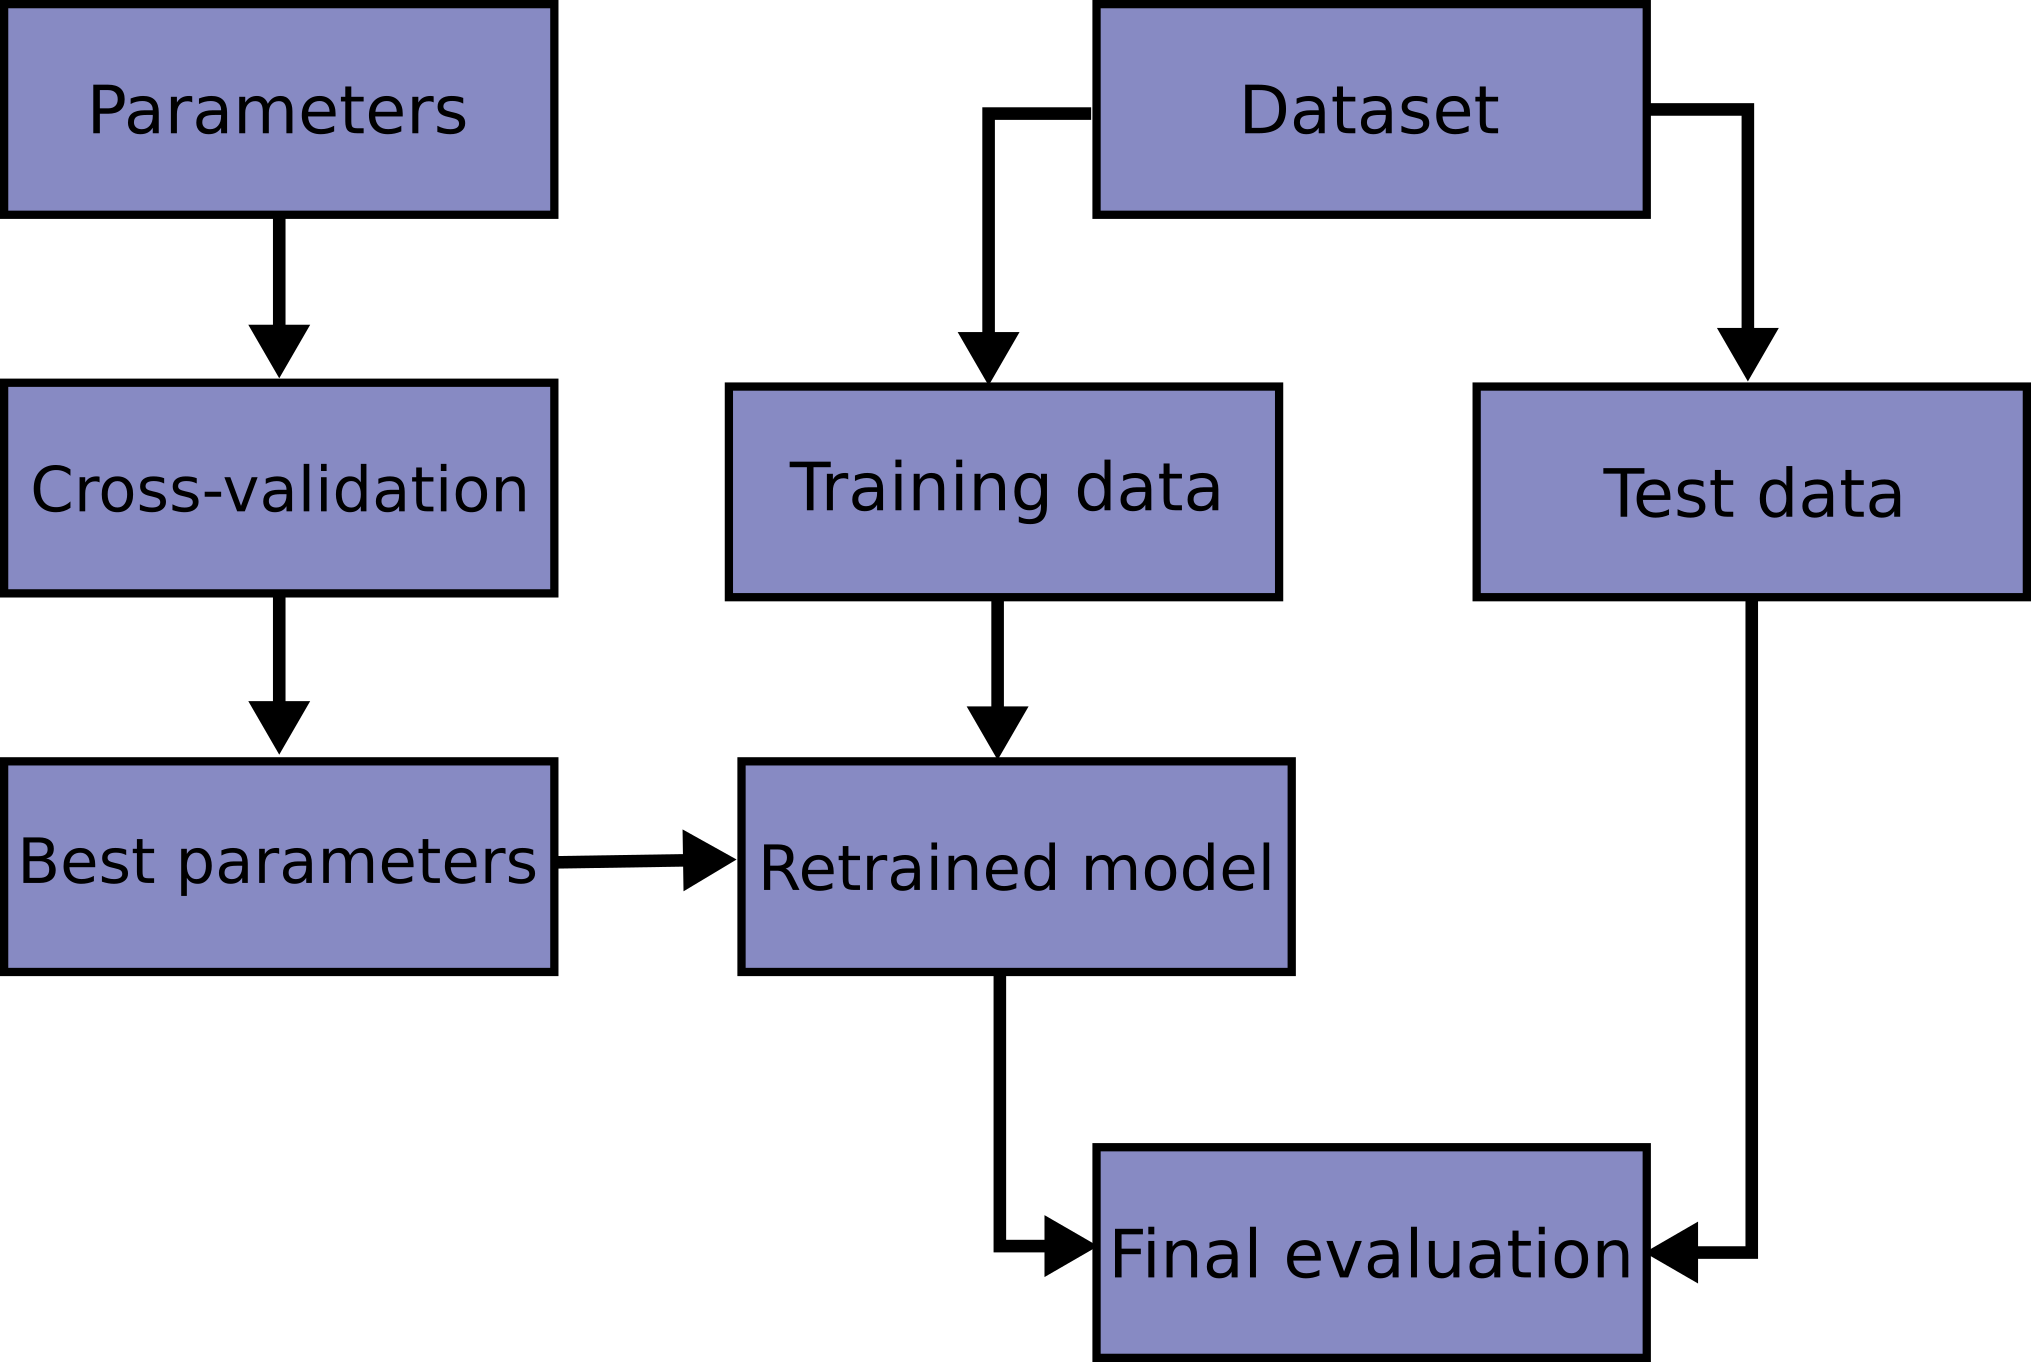

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. Let’s load the iris data set to fit a linear support vector machine on it:

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

The three steps involved in cross-validation are as follows :
    
1. Reserve some portion of sample data-set.
2. Using the rest data-set train the model.
3. Test the model using the reserve portion of the data-set.

# Methods of Cross Validation

### Validation
In this method, we perform training on the 50% of the given data-set and rest 50% is used for the testing purpose. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e higher bias.

### LOOCV (Leave One Out Cross Validation)
In this method, we perform training on the whole data-set but leaves only one data-point of the available data-set and then iterates for each data-point. It has some advantages as well as disadvantages also.

- An advantage of using this method is that we make use of all data points and hence it is low bias.

- The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. 
- Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.

### K-Fold Cross Validation
In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

Note:
It is always suggested that the value of k should be 10 as the lower value of k is takes towards validation and higher value of k leads to LOOCV method.

In [ ]:
Total instances: 25
Value of k     : 5 

No. Iteration              Training set observations                     Testing set observations
 1      [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]   [0 1 2 3 4]
 2      [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]   [5 6 7 8 9]
 3      [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]   [10 11 12 13 14]
 4      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]   [15 16 17 18 19]
 5      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]   [20 21 22 23 24]

### Comparison of train/test split to cross-validation


Advantages of train/test split:

- This runs K times faster than Leave One Out cross-validation because K-fold cross-validation repeats the train/test split K-times.
- Simpler to examine the detailed results of the testing process.

Advantages of cross-validation:

- More accurate estimate of out-of-sample accuracy.
- More “efficient” use of data as every observation is used for both training and testing.

In [ ]:
# importing cross-validation from sklearn package.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [ ]:
import pandas as pd
df = pd.DataFrame({'y': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
                   'x1': [2, 5, 4, 3, 4, 6, 7, 5, 8, 9],
                   'x2': [14, 12, 12, 13, 7, 8, 7, 4, 6, 5]})

In [ ]:
df

In [ ]:
Perform K-Fold Cross-Validation
Next, we’ll then fit a multiple linear regression model to the dataset and perform LOOCV to evaluate the model performance.

In [ ]:
#define predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

In [ ]:
#define cross-validation method to use
cv=KFold(n_splits=10,random_state=1, shuffle=True)

In [ ]:
#Perform K-Fold Cross-Validation
model = LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [ ]:
mean(absolute(scores))

From the output we can see that the mean absolute error (MAE) was 3.614. That is, the average absolute error between the model prediction and the actual observed data is 3.614.

In general, the lower the MAE, the more closely a model is able to predict the actual observations.

Another commonly used metric to evaluate model performance is the root mean squared error (RMSE). The following code shows how to calculate this metric using LOOCV:

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

In [ ]:
#K-fold Cross Validation using scikit learn
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#Loading the dataset
data = load_breast_cancer(as_frame = True)
df = data.frame
print(df.head())
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
df.columns

In [ ]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

In [ ]:
#Cross Validation Using cross_val_score()

from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 

result = cross_val_score(model , X, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm


In [ ]:
X,y=datasets.load_iris(True)

In [ ]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
model = svm.SVC(kernel='linear', C=1)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

1. A model is trained using  of the folds as training data;

2. the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, X, y, cv=5)

In [ ]:
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores =cross_val_score(model, X, y, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
#Leave One Out (LOO)
X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

# Confusion matrix 

In [ ]:
import pandas as pd

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

In [ ]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

# Confusion matrix with SKLEARN

In [ ]:
from sklearn import tree
df = pd.read_csv("d:\\MLDataSet\\iris.csv") 

df.head()

In [ ]:
X=df[['sepal.length','sepal.width','petal.length','petal.width']]
Y=df['variety']

In [ ]:
X.fillna(X.mean(),inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30)

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
 
print(classification_report(y_test, y_pred))

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[2 2]
 [1 5]]
Outcome values : 
 2 2 1 5
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           0       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
X_actual = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Y_predic = [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
results = confusion_matrix(X_actual, Y_predic)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(X_actual, Y_predic))
print ('Classification Report : ')
print (classification_report(X_actual, Y_predic))
print('AUC-ROC:',roc_auc_score(X_actual, Y_predic))
print('LOGLOSS Value is',log_loss(X_actual, Y_predic))

Confusion Matrix :
[[3 3]
 [1 3]]
Accuracy Score is 0.6
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

AUC-ROC: 0.625
LOGLOSS Value is 13.815750437193334


# Multi-label confusion matrix

In [57]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array([[1, 0, 1],[0, 1, 0]])
y_pred = np.array([[1, 0, 0],[0, 1, 1]])
multilabel_confusion_matrix(y_true, y_pred)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0]]], dtype=int64)

In [ ]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
multilabel_confusion_matrix(y_true, y_pred,labels=["ant", "bird", "cat"])

In [ ]:
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
metrics.precision_score(y_true, y_pred)

In [ ]:
metrics.recall_score(y_true, y_pred)


In [ ]:
metrics.f1_score(y_true, y_pred)

In [ ]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
metrics.precision_score(y_true, y_pred, average='macro')

In [ ]:
metrics.recall_score(y_true, y_pred, average='micro')

In [ ]:
metrics.f1_score(y_true, y_pred, average='weighted')

In [ ]:
metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)

In [ ]:
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5, average=None)

# Confusion Matrix using seaborn

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

# Logarithmic Loss

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

In [ ]:
from sklearn.metrics import log_loss
LogLoss = log_loss(df['y_Actual'], df['y_Predicted'], eps = 1e-15,normalize = True, sample_weight = None, labels = None)

print(LogLoss)

In [ ]:
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
log_loss(y_true, y_pred)

# AUC and ROC Curve

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [ ]:
bc=datasets.load_breast_cancer()


In [ ]:
X=bc.data
Y=bc.target

In [ ]:
import pandas as pd
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [ ]:
x_train

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
model.classes_

In [ ]:
y_prob=model.predict_proba(x_test)[:, 1]


In [ ]:
roc_auc_score(y_test,y_prob)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
clf.classes_

In [ ]:
y_score = clf.predict_proba(X)[:, 1]
roc_auc_score(y, y_score)

#  Kendall Rank correlation

In [ ]:
from scipy.stats import kendalltau
  
# Taking values from the above example in Lists
X = [1, 2, 3, 4, 5, 6, 7]
Y = [1, 3, 6, 2, 7, 4, 5]
  
# Calculating Kendall Rank correlation
corr, _ = kendalltau(X, Y)
print('Kendall Rank correlation: %.5f' % corr)

# Covariance & Corelation

In [ ]:
import numpy as np
import pandas as pd
  
# loading in the iris dataset for demo purposes
  
dataset = pd.read_csv("d://MLDataSet//iris_dataset.csv")
  
dataset.head()

In [ ]:
data = dataset.iloc[:, :-1].values

In [ ]:
# calculates the covariance between x and y
def calcCov(x, y):
  
    mean_x, mean_y = x.mean(), y.mean()
    n = len(x)
  
    return sum((x - mean_x) * (y - mean_y)) / n
  
  
# calculates the Covariance matrix
def covMat(data):
  
    # get the rows and cols
    rows, cols = data.shape
  
    # the covariance matroix has a shape of n_features x n_features
    # n_featurs  = cols - 1 (not including the target column)
    cov_mat = np.zeros((cols, cols))
  
    for i in range(cols):
  
        for j in range(cols):
            # store the value in the matrix
            cov_mat[i][j] = calcCov(data[:, i], data[:, j])
  
    return cov_mat

In [ ]:
covMat(data)

In [ ]:
import numpy as np
  
x = np.array([[0, 3, 4], [1, 2, 4], [3, 4, 5]])
  
print("Shape of array:\n", np.shape(x))
  
print("Covarinace matrix of x:\n", np.cov(x))

In [ ]:
import numpy as np

np.random.seed(10)

# generating 10 random values for each of the two variables
X = np.random.randn(10)

Y = np.random.randn(10)

# computing the corrlation matrix
C = np.corrcoef(X,Y)

print(C)

# Plotting the correlation matrix

In [ ]:
from sklearn.datasets import load_breast_cancer

import pandas as pd

breast_cancer = load_breast_cancer()

data = breast_cancer.data

features = breast_cancer.feature_names

df = pd.DataFrame(data, columns = features)

print(df.shape)

print(features)

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# taking all rows but only 6 columns
df_small = df.iloc[:,:6]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

# Evaluation metrics 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 

In [ ]:
# choose a binary classification problem
data = load_breast_cancer()
# develop predictors X and target y dataframes
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)
# split data into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# build a RF model with default parameters
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test) 

In [ ]:
#Confusion Matrix
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(autopct = '%0.1f%%')
plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)        ', size=14, c='green')
plt.tight_layout(); 
plt.show() 

In [ ]:
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'])

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel() 

In [ ]:
#Accuracy
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

In [ ]:
#Precision
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=0)
print(precision_positive, precision_negative )

In [ ]:
#Recall
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
print(recall_sensitivity, recall_specificity )

In [ ]:
#F1-score
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=0)
print(f1_positive, f1_negative)

In [ ]:
print(metrics.classification_report(y_test, preds))

In [ ]:
# ROC and AUC score
sns.set_style('darkgrid')
preds_train = model.predict(X_train)
# calculate prediction probability
prob_train = np.squeeze(model.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(model.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 